In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"


'abusive content detection and prevention platform.drawio'
'associate cert.pdf'
'AWS cert.pdf'
'cat_img.zip '
 cat_voice.zip
'Colab Notebooks'
'Copy of Copy of PPT TEMPLATE (4).pptx'
 DOC-20241127-WA0029..pdf
'Document from Mithali♡☆'
 eCertificate.pdf
'flow charr'
'Github Details (1).xlsx'
'Github Details (2).xlsx'
'Github Details.xlsx'
'Google Student Ambassador.mp4'
 ibytecert.pdf
'ID .pdf'
'internship '
 internship.pdf
'marks .pdf'
'Nptel (1).pdf'
 Nptel.pdf
'oracle badge'
 pop23EC1202.pdf
'POP TRAINING ELIGIB;LE LIST.pdf'
'resume  (1).pdf'
'resume .pdf'
 ResumE.pdf
'screenshotttt (1).jpg'
 screenshotttt.jpg
'Untitled Diagram (1).drawio'
'Untitled Diagram (2).drawio'
'Untitled Diagram (3).drawio'
'Untitled Diagram (4).drawio'
'Untitled Diagram (5).drawio'
'Untitled Diagram.drawio'
'WhatsApp Image 2025-08-01 at 23.26.01_5bb8ccfa.jpg'


In [ ]:
import zipfile
import os

extract_img_path = "/content/data/img"
extract_audio_path = "/content/data/audio"

os.makedirs(extract_img_path, exist_ok=True)
os.makedirs(extract_audio_path, exist_ok=True)

# Extract images
with zipfile.ZipFile("/content/drive/MyDrive/cat_img.zip ", 'r') as zip_ref:
    zip_ref.extractall(extract_img_path)

# Extract audio
with zipfile.ZipFile("/content/drive/MyDrive/cat_voice.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_audio_path)

print("Extraction done!")
print("Image folders:", os.listdir(extract_img_path))
print("Audio folders:", os.listdir(extract_audio_path))


Extraction done!
Image folders: ['Normal', 'Surprised', 'Happy', 'Sad', 'Angry', 'Disgusted', 'Scared']
Audio folders: ['CAT_DB']


In [ ]:
import os
from PIL import Image

IMG_DIR = "/content/data/img"
AUDIO_DIR = "/content/data/audio/CAT_DB"

print("=== IMAGE DATASET ===")
for emo in sorted(os.listdir(IMG_DIR)):
    path = os.path.join(IMG_DIR, emo)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
        print(f"{emo:<12} : {count} images")

print("\n=== AUDIO DATASET ===")
for folder in os.listdir(AUDIO_DIR):
    path = os.path.join(AUDIO_DIR, folder)
    if os.path.isdir(path):
        count = len([f for f in os.listdir(path) if f.lower().endswith(('.wav','.mp3'))])
        print(f"{folder:<12} : {count} audio files")


=== IMAGE DATASET ===
Angry        : 360 images
Disgusted    : 201 images
Happy        : 236 images
Normal       : 246 images
Sad          : 258 images
Scared       : 257 images
Surprised    : 288 images

=== AUDIO DATASET ===
Paining      : 10 audio files
Defense      : 10 audio files
Happy        : 10 audio files
Fighting     : 10 audio files
HuntingMind  : 10 audio files
Mating       : 10 audio files
MotherCall   : 10 audio files
Angry        : 10 audio files
Resting      : 10 audio files


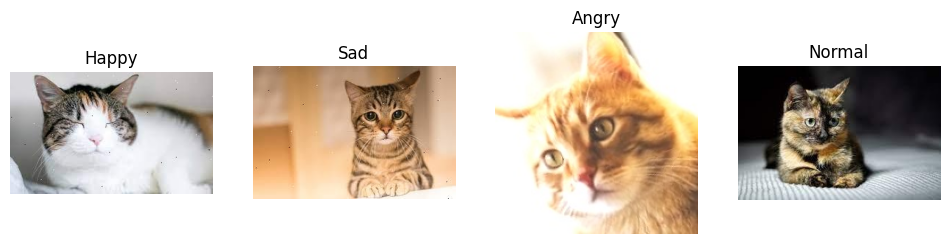

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for i, emo in enumerate(['Happy','Sad','Angry','Normal']):  # choose few for preview
    folder = os.path.join(IMG_DIR, emo)
    sample = os.listdir(folder)[0]  # first image
    img = Image.open(os.path.join(folder, sample))

    plt.subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(emo)
    plt.axis('off')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    IMG_DIR,
    target_size=(224,224),
    subset="training",
    batch_size=32,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    IMG_DIR,
    target_size=(224,224),
    subset="validation",
    batch_size=32,
    class_mode='categorical'
)


Found 1479 images belonging to 7 classes.
Found 367 images belonging to 7 classes.


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

audio_input = AUDIO_DIR
audio_output = "/content/data/audio_spectrograms"
os.makedirs(audio_output, exist_ok=True)

for emo in os.listdir(audio_input):
    emo_folder = os.path.join(audio_input, emo)
    out_folder = os.path.join(audio_output, emo)
    os.makedirs(out_folder, exist_ok=True)

    for file in os.listdir(emo_folder):
        if file.lower().endswith(('.wav','.mp3')):
            y, sr = librosa.load(os.path.join(emo_folder,file), sr=16000)
            # Remove silent parts
            y, _ = librosa.effects.trim(y)

            # Generate Mel spectrogram
            mel = librosa.feature.melspectrogram(y=y, sr=sr)
            mel_db = librosa.power_to_db(mel, ref=np.max)

            # Save as image
            plt.figure(figsize=(3,3))
            librosa.display.specshow(mel_db, sr=sr, cmap='magma')
            plt.axis('off')

            out_path = os.path.join(out_folder, file.replace('.wav','.png').replace('.mp3','.png'))
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
            plt.close()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Image classes
image_classes = sorted(os.listdir(IMG_DIR))
print("Image Classes:", image_classes)

# Audio classes
audio_classes = sorted(os.listdir(audio_output))
print("Audio Classes:", audio_classes)

# Label encoding example
le = LabelEncoder()
le.fit(image_classes + audio_classes)
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Image Classes: ['Angry', 'Disgusted', 'Happy', 'Normal', 'Sad', 'Scared', 'Surprised']
Audio Classes: ['Angry', 'Defense', 'Fighting', 'Happy', 'HuntingMind', 'Mating', 'MotherCall', 'Paining', 'Resting', 'Warning']
Label mapping: {np.str_('Angry'): np.int64(0), np.str_('Defense'): np.int64(1), np.str_('Disgusted'): np.int64(2), np.str_('Fighting'): np.int64(3), np.str_('Happy'): np.int64(4), np.str_('HuntingMind'): np.int64(5), np.str_('Mating'): np.int64(6), np.str_('MotherCall'): np.int64(7), np.str_('Normal'): np.int64(8), np.str_('Paining'): np.int64(9), np.str_('Resting'): np.int64(10), np.str_('Sad'): np.int64(11), np.str_('Scared'): np.int64(12), np.str_('Surprised'): np.int64(13), np.str_('Warning'): np.int64(14)}


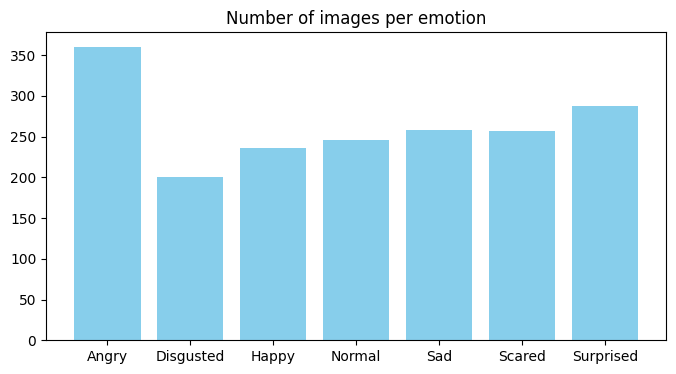

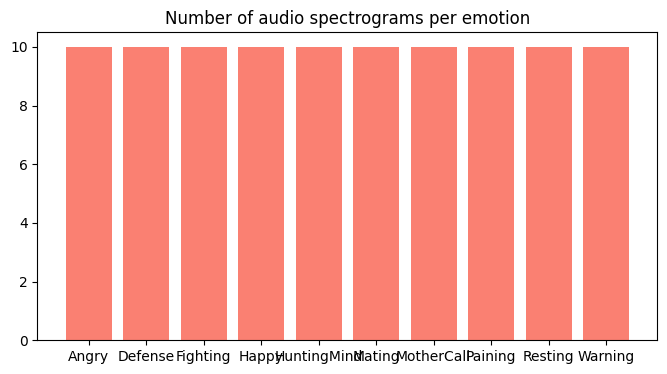

In [ ]:
# Image counts bar chart
import matplotlib.pyplot as plt

img_counts = [len(os.listdir(os.path.join(IMG_DIR, c))) for c in image_classes]
plt.figure(figsize=(8,4))
plt.bar(image_classes, img_counts, color='skyblue')
plt.title("Number of images per emotion")
plt.show()

# Audio spectrogram counts
audio_counts = [len(os.listdir(os.path.join(audio_output,c))) for c in audio_classes]
plt.figure(figsize=(8,4))
plt.bar(audio_classes, audio_counts, color='salmon')
plt.title("Number of audio spectrograms per emotion")
plt.show()


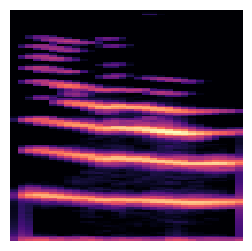

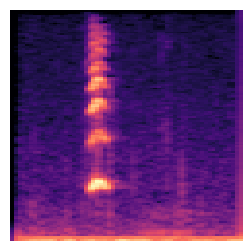

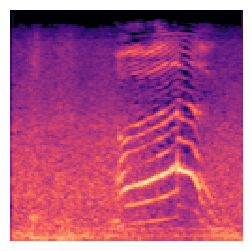

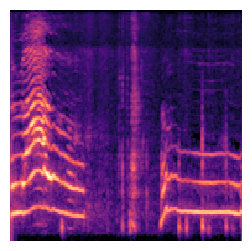

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_input = "/content/data/audio/CAT_DB"
audio_output = "/content/data/audio_spectrograms"
os.makedirs(audio_output, exist_ok=True)

# Pick a few emotions to preview
preview_emotions = ['Happy', 'Angry', 'Sad']

for emo in os.listdir(audio_input):
    emo_folder = os.path.join(audio_input, emo)
    out_folder = os.path.join(audio_output, emo)
    os.makedirs(out_folder, exist_ok=True)

    for i, file in enumerate(os.listdir(emo_folder)):
        if file.lower().endswith(('.wav', '.mp3')):
            y, sr = librosa.load(os.path.join(emo_folder, file), sr=16000)
            y, _ = librosa.effects.trim(y)

            # Generate Mel spectrogram
            mel = librosa.feature.melspectrogram(y=y, sr=sr)
            mel_db = librosa.power_to_db(mel, ref=np.max)

            # Save as image
            out_path = os.path.join(out_folder, file.replace('.wav','.png').replace('.mp3','.png'))
            plt.figure(figsize=(3,3))
            librosa.display.specshow(mel_db, sr=sr, cmap='magma')
            plt.axis('off')
            plt.savefig(out_path, bbox_inches='tight', pad_inches=0)

            # Show the first few spectrograms inline
            if emo in preview_emotions and i < 2:  # show first 2 examples per emotion
                plt.show()
            plt.close()
